# Chem 277B - Fall 2024 - Homework 2 
## Logistic Regression
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Sept 30 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**<br>
<br>
## Problem (25 P)

Write a Python script **AnalyzeMoleculesLogReg** using *def*, that performs the following analysis:<br>
<br>
1) Loading the **categorical** molecule data set *"molecular_test_gbc_cat.csv"* and *"molecular_train_gbc_cat.csv"*<br>
2) Performing a **logistic regression** using the Python libarary *statsmodels*. The syntax is<br>

similar to linear regression but trying to predict a probability

minmaxscaler = all features are in range between 0 and 1


In [1]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#import
Test = pd.read_csv("data_277b_HW/molecular_test_gbc.csv")
Train = pd.read_csv("data_277b_HW/molecular_train_gbc.csv")

test_features = Test.drop(columns = "label")
train_features = Train.drop(columns = "label")

#combine and scale
combined_ds = pd.concat([test_features, train_features], axis = 0)

(rows, _) = Test.shape

scaler = MinMaxScaler(feature_range = (0,1))
combined_ds_scaled = scaler.fit_transform(combined_ds)

Test_scaled = pd.DataFrame(combined_ds_scaled[:rows,:], columns = test_features.columns)
Train_scaled = pd.DataFrame(combined_ds_scaled[rows:,:], columns = train_features.columns)

TrainX_scaled = Train_scaled


X = sm.add_constant(TrainX_scaled)# adding intercept

#Y = pd.get_dummies(Train['label'])# when using in accuracy_score gets ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets
Y = pd.get_dummies(Train['label'], drop_first = True) #one way to stop ValueError: accuracy .51
#Y_single = Y.values.argmax(axis = 1) #another way to stop valueError but lower accuracy .49

#perform logistic regression 
my_model = sm.GLM(Y, X, family = sm.families.Binomial()).fit()


#evaluate model by returning the accuracy
y_pred_probabilities = my_model.predict(X)

#convert continuous predictions to binary using a threshold of 0.5
y_pred = (y_pred_probabilities >= 0.5).astype(int)
accuracy = accuracy_score(Y, y_pred)



print(f"Accuracy Score: {accuracy}")
print(my_model.summary())


Accuracy Score: 0.80375
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Toxic   No. Observations:                  800
Model:                            GLM   Df Residuals:                      794
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -332.82
Date:                Fri, 27 Sep 2024   Deviance:                       665.64
Time:                        14:15:39   Pearson chi2:                 1.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4243
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const       

Don't forget proper scaling of the data (see also the lecture slides)!

3) Evaluating the model by returning the accuracy.<br>
4) Evaluating the model by creating a **confusion matrix**. The **confusion matrix** can be generated with sns.heatmap or by using the corresponding library<br>

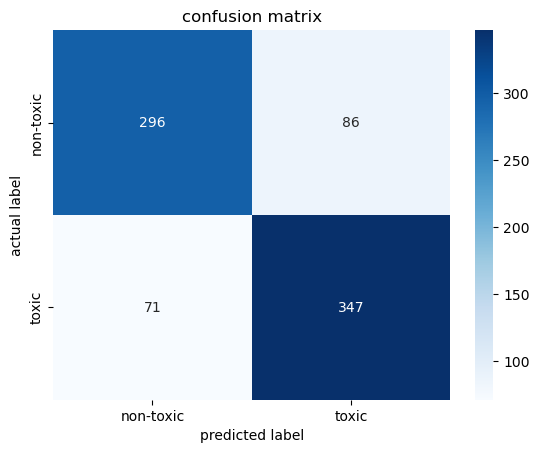

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion_matrix(actual, predicted)
cm = confusion_matrix(Y, y_pred)

sns.heatmap(cm,
            annot = True,
            fmt = 'd',
            cmap = "Blues",
            xticklabels = ["non-toxic", "toxic"],
            yticklabels = ["non-toxic","toxic"])

plt.title('confusion matrix')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

The result should look similar to the following plot:<br>
<br>
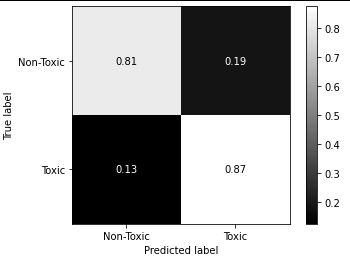

5) Evaluating the model by plotting a histogram that shows how certain the model was in terms of assigned probabilities to the predicted classes. The result should look similar to the following plot:<br>
<br>

In [3]:
display(y_pred)

0      1
1      1
2      0
3      0
4      0
      ..
795    1
796    0
797    0
798    1
799    1
Length: 800, dtype: int64

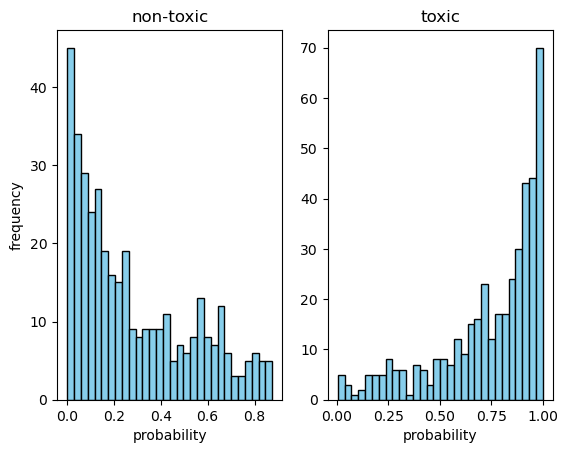

'\nfig, axs = plt. subplots(2, 1, figsize = (8,10))\n\nsns.kdeplot(non_toxic, ax = axs[0], color = "black")\naxs[0].set_title(\'Non-toxic\')\naxs[0].set_xlabel(\'Probability\')\naxs[0].set_ylabel(\'Frequency\')\n\nsns.kdeplot(toxic, ax = axs[1], color = "black")\naxs[1].set_title(\'Non-toxic\')\naxs[1].set_xlabel(\'Probability\')\naxs[1].set_ylabel(\'Frequency\')\n'

In [4]:
import matplotlib.pyplot as plt

non_toxic = y_pred_probabilities[Y['Toxic'] == False]
toxic = y_pred_probabilities[Y['Toxic'] == True]

#try ploting y_pred?

plt.subplot(1,2,1)
plt.xlabel('probability')
plt.ylabel('frequency')
plt.hist(non_toxic, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('non-toxic')

plt.subplot(1,2,2)
plt.xlabel('probability')
plt.hist(toxic, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('toxic')




plt.show()

'''
fig, axs = plt. subplots(2, 1, figsize = (8,10))

sns.kdeplot(non_toxic, ax = axs[0], color = "black")
axs[0].set_title('Non-toxic')
axs[0].set_xlabel('Probability')
axs[0].set_ylabel('Frequency')

sns.kdeplot(toxic, ax = axs[1], color = "black")
axs[1].set_title('Non-toxic')
axs[1].set_xlabel('Probability')
axs[1].set_ylabel('Frequency')
'''

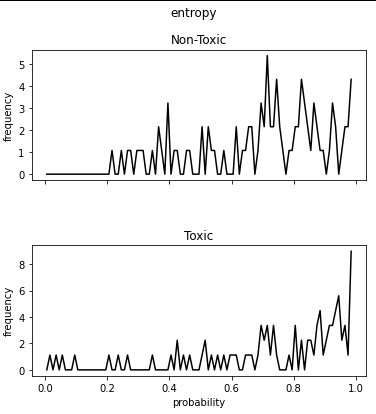

Accuracy Score: 0.80375
model summary:                  Generalized Linear Model Regression Results                  
Dep. Variable:                  Toxic   No. Observations:                  800
Model:                            GLM   Df Residuals:                      794
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -332.82
Date:                Fri, 27 Sep 2024   Deviance:                       665.64
Time:                        14:19:32   Pearson chi2:                 1.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4243
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

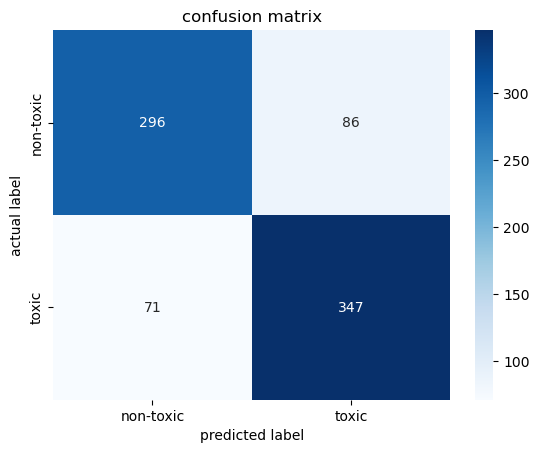

In [10]:
def AnalyzeMoleculesLogReg(path_to_test_file, path_to_train_file):
    '''
    returns accuracy of 

    '''
    Test = pd.read_csv(path_to_test_file)
    Train = pd.read_csv(path_to_train_file)

    test_features = Test.drop(columns = "label")
    train_features = Train.drop(columns = "label")

    #combine and scale
    combined_ds = pd.concat([test_features, train_features], axis = 0)

    (rows, _) = Test.shape

    scaler = MinMaxScaler(feature_range = (0,1))
    combined_ds_scaled = scaler.fit_transform(combined_ds)

    Test_scaled = pd.DataFrame(combined_ds_scaled[:rows,:], columns = test_features.columns)
    Train_scaled = pd.DataFrame(combined_ds_scaled[rows:,:], columns = train_features.columns)

    TrainX_scaled = Train_scaled


    X = sm.add_constant(TrainX_scaled)# adding intercept

    #Y = pd.get_dummies(Train['label'])# when using in accuracy_score gets ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets
    Y = pd.get_dummies(Train['label'], drop_first = True) #one way to stop ValueError: accuracy .51
    #Y_single = Y.values.argmax(axis = 1) #another way to stop valueError but lower accuracy .49

    #perform logistic regression 
    my_model = sm.GLM(Y, X, family = sm.families.Binomial()).fit()


    #evaluate model by returning the accuracy
    y_pred_probabilities = my_model.predict(X)

    #convert continuous predictions to binary using a threshold of 0.5
    y_pred = (y_pred_probabilities >= 0.5).astype(int)
    accuracy = accuracy_score(Y, y_pred)


    print(f"Accuracy Score: {accuracy}")
    print (f"model summary: {my_model.summary()}")

    cm = confusion_matrix(Y, y_pred)

    sns.heatmap(cm,
                annot = True,
                fmt = 'd',
                cmap = "Blues",
                xticklabels = ["non-toxic", "toxic"],
                yticklabels = ["non-toxic","toxic"])

    plt.title('confusion matrix')
    plt.ylabel('actual label')
    plt.xlabel('predicted label')
    plt.show()

            
AnalyzeMoleculesLogReg("data_277b_HW/molecular_test_gbc.csv","data_277b_HW/molecular_train_gbc.csv")